$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Classification with Nonlinear Logistic Regression Using Neural Networks

## Motivation and Setup

Linear function approximator as a neural network.

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/nnlinear.png">

What must we add to do logistic regression?

Just add the softmax calculation to the output layer. 

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/nnlinearlogisticregression.png">

Any thoughts on how to do nonlinear logistic regression?

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/nntwolayerlogisticregression.png">


## Derivation

We will maximize the log likelihood of the training data.
$$
  \begin{align*}
    L(\Wv) & = \left ( \prod_{n=1}^N \prod_{k=1}^K P(C=k|\xv_n)^{t_{n,k}} \right ) \\
    \log L(\Wv) & = LL(\Wv) =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log P(C=k|\xv_n)\\
     & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_{n,k}
   \end{align*}
$$

## Gradient of the Log Likelihood

$$
      \begin{align*}
        LL(\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k}
      \log g_{n,k}\;\;\;\;\; \text{ where } g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^K \eby{m}}; \\
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} \frac{\partial g_{n,k}}{\partial \Wv_{d,j}}\\    
        \end{align*}
$$



## Linear Version

General gradient

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

For linear logistic regression, $y_{n,j} = \xv_n^T \Wv_{*,j}$, so $\frac{\partial y_{n,k}}{\partial \Wv_{d,j}}$ exists only when $j=k$, so

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N (t_{n,j} - g_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{d,j}}\\
         & =  \sum_{n=1}^N \left ( t_{n,j} - g_{n,j} \right ) \xv_{d,j}
      \end{align*}
$$

## Nonlinear Version

First the general form again.

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

Now $y_{n,j}$ depends on $\Vv$ and $\Wv$, so

$$
      \begin{align*}
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & = \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


But, thank goodness, we have already calculated $\frac{\partial y_{n,k}}{\partial \Vv_{d,m}}$ and 
$\frac{\partial y_{n,k}}{\partial \Wv_{m,k}}$ in our previous neural network lectures.  This becomes more clear when we compare above with the derivatives of
mean squared error with respect to weights for neural networks for regression problems.

$$
      \begin{align*}
      E &= \frac{1}{NK}  \frac{1}{2} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial \Vv_{d,m}} & = - \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N  (t_{n,j} - y_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$

Compare to gradients for likelihood

$$
      \begin{align*}
        LL(\Vv,\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log
        g_{n,k} \text{ where }  g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^{K} \eby{m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


So, our previously derived matrix expressions for neural networks can
be used if we modify the output calculation.  Here are the expressions
we used for minimizing mean squared error:

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        E &= \frac{1}{NK} \frac{1}{2} \sum (\Tv - \Yv)^2\\
        \grad_\Vv E &=  - \frac{1}{NK}  \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv E &=  - \frac{1}{NK} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$


Here are the changes needed for nonlinear logistic regression. $\Tiv$
is indicator variables for  $\Tv$  

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= e^{\Yv}\\
        \Sv &= \Fv \ones{K}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\Tiv - \Gv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\Tiv - \Gv)
      \end{align*}
$$

## Two-Dimensional Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

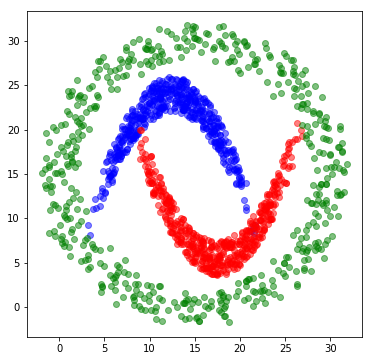

In [3]:
n = 500
x1 = np.linspace(5,20,n) + np.random.uniform(-2,2,n)
y1 = ((20-12.5)**2-(x1-12.5)**2) / (20-12.5)**2 * 10 + 14 + np.random.uniform(-2,2,n)
x2 = np.linspace(10,25,n) + np.random.uniform(-2,2,n)
y2 = ((x2-17.5)**2) / (25-17.5)**2 * 10 + 5.5 + np.random.uniform(-2,2,n)
angles = np.linspace(0,2*np.pi,n)
x3 = np.cos(angles) * 15 + 15 + np.random.uniform(-2,2,n)
y3 = np.sin(angles) * 15 + 15 + np.random.uniform(-2,2,n)
X =  np.vstack((np.hstack((x1,x2,x3)), np.hstack((y1,y2,y3)))).T
T = np.repeat(range(1,4),n).reshape((-1,1))
colors = ['blue','red','green']
plt.figure(figsize=(6,6))
for c in range(1,4):
    mask = (T == c).flatten()
    plt.plot(X[mask,0],X[mask,1],'o',markersize=6, alpha=0.5, color=colors[c-1])

Let's try to classify this data with a 5 hidden unit neural network with nonlinear logistic regression.  In Python, do this by defining a new class *NeuralNetClassifier* it is easy to create a new class for using a neural network
as a classifier by making a subclass *NeuralNetworkClassifier* of the
*NeuralNetwork* and make the required changes.  The changes will be in *objectiveF* and *gradF* functions local to the *train* method, and in the *use* method.

In [4]:
!wget http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar
!mv nn2.tar.1 nn2.tar   # in case I already have a file named nn2.tar in this directory
!tar xvf nn2.tar

--2017-10-31 09:43:31--  http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar
Resolving www.cs.colostate.edu (www.cs.colostate.edu)... 129.82.45.114
Connecting to www.cs.colostate.edu (www.cs.colostate.edu)|129.82.45.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51200 (50K) [application/x-tar]
Saving to: ‘nn2.tar’

nn2.tar             100%[===================>]  50.00K  --.-KB/s    in 0.01s   

2017-10-31 09:43:31 (3.83 MB/s) - ‘nn2.tar’ saved [51200/51200]

mv: cannot stat 'nn2.tar.1': No such file or directory
neuralnetworks.py
mlutils.py
scaledconjugategradient.py


In [5]:
cat neuralnetworks.py


import numpy as np
import scaledconjugategradient as scg
import mlutils as ml  # for draw()
from copy import copy
import sys  # for sys.float_info.epsilon
import pdb

######################################################################
### class NeuralNetwork
######################################################################

class NeuralNetwork:

    def __init__(self, ni,nhs,no):        
        if nhs == 0 or nhs == [0] or nhs is None or nhs == [None]:
            nhs = None
        else:
            try:
                nihs = [ni] + list(nhs)
            except:
                nihs = [ni] + [nhs]
                nhs = [nhs]
        if nhs is not None:
            self.Vs = [(np.random.uniform(-1,1,size=(1+nihs[i],nihs[i+1])) / np.sqrt(nihs[i]))  for i in range(len(nihs)-1)]
            self.W = np.zeros((1+nhs[-1],no))
            # self.W = (np.random.uniform(-1,1,size=(1+nhs[-1],no)) / np.sqrt(nhs[-1]))
        else:
            self.Vs = None
            self.W = np.zer

SCG: Iteration 100 ObjectiveF=0.03557 Scale=1.000e-15 Time=0.00030 s/iter
SCG: Iteration 200 ObjectiveF=0.01851 Scale=1.000e-15 Time=0.00030 s/iter
SCG: Iteration 300 ObjectiveF=0.01485 Scale=1.000e-15 Time=0.00032 s/iter
SCG: Iteration 400 ObjectiveF=0.01351 Scale=1.000e-15 Time=0.00046 s/iter
SCG: Iteration 500 ObjectiveF=0.01266 Scale=1.000e-15 Time=0.00036 s/iter
SCG: Iteration 600 ObjectiveF=0.01128 Scale=1.000e-15 Time=0.00036 s/iter
SCG: Iteration 700 ObjectiveF=0.01098 Scale=1.000e-15 Time=0.00030 s/iter
SCG: Iteration 800 ObjectiveF=0.01049 Scale=1.000e-15 Time=0.00046 s/iter
SCG: Iteration 900 ObjectiveF=0.01033 Scale=1.000e-15 Time=0.00030 s/iter
SCG: Iteration 1000 ObjectiveF=0.01018 Scale=1.000e-15 Time=0.00031 s/iter
4.57238724205 1.76221245832 2066.11570248


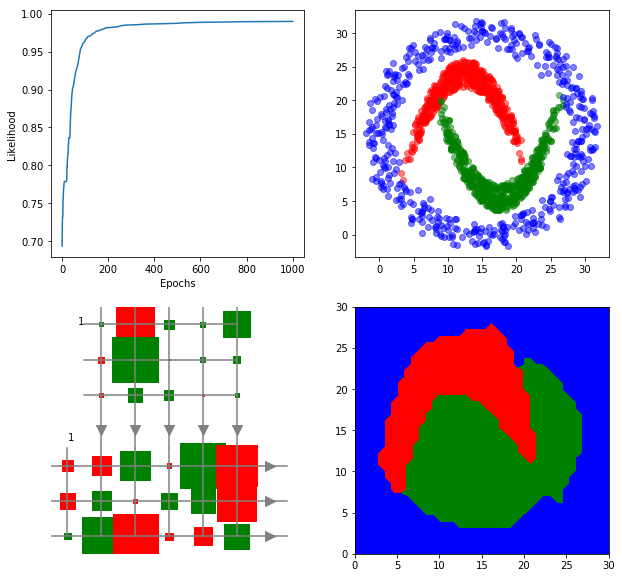

In [6]:
import neuralnetworks as nn
import mpl_toolkits.mplot3d as plt3
from matplotlib import cm

## if you edit neuralnetwork.py, force ipython to reload it by doing this.
# from imp import reload
# reload(nn)

nHidden = 5
nnet = nn.NeuralNetworkClassifier(2,nHidden,3) # 3 classes, will actually make 2-unit output layer
nnet.train(X,T,  nIterations=1000, verbose=True)

xs = np.linspace(0,30,40)
x,y = np.meshgrid(xs,xs)
Xtest = np.vstack((x.flat,y.flat)).T
Ytest = nnet.use(Xtest)
predTest,probs,_ = nnet.use(Xtest,allOutputs=True)  #discard hidden unit outputs

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel("Epochs")
plt.ylabel("Likelihood")

plt.subplot(2,2,3)
nnet.draw()

colors = ['red','green','blue']
plt.subplot(2,2,2)

for c in range(1,4):
    mask = (T == c).flatten()
    plt.plot(X[mask,0],X[mask,1],'o',markersize=6, alpha=0.5, color=colors[c-1])

plt.subplot(2,2,4)
plt.contourf(Xtest[:,0].reshape((40,40)),Xtest[:,1].reshape((40,40)), predTest.reshape((40,40)),
             levels = [0.5,1.99,2.01,3.5], #    levels=(0.5,1.5,2.5,3.5),
             colors=('red','green','blue'));

In [7]:
from matplotlib.colors import LightSource

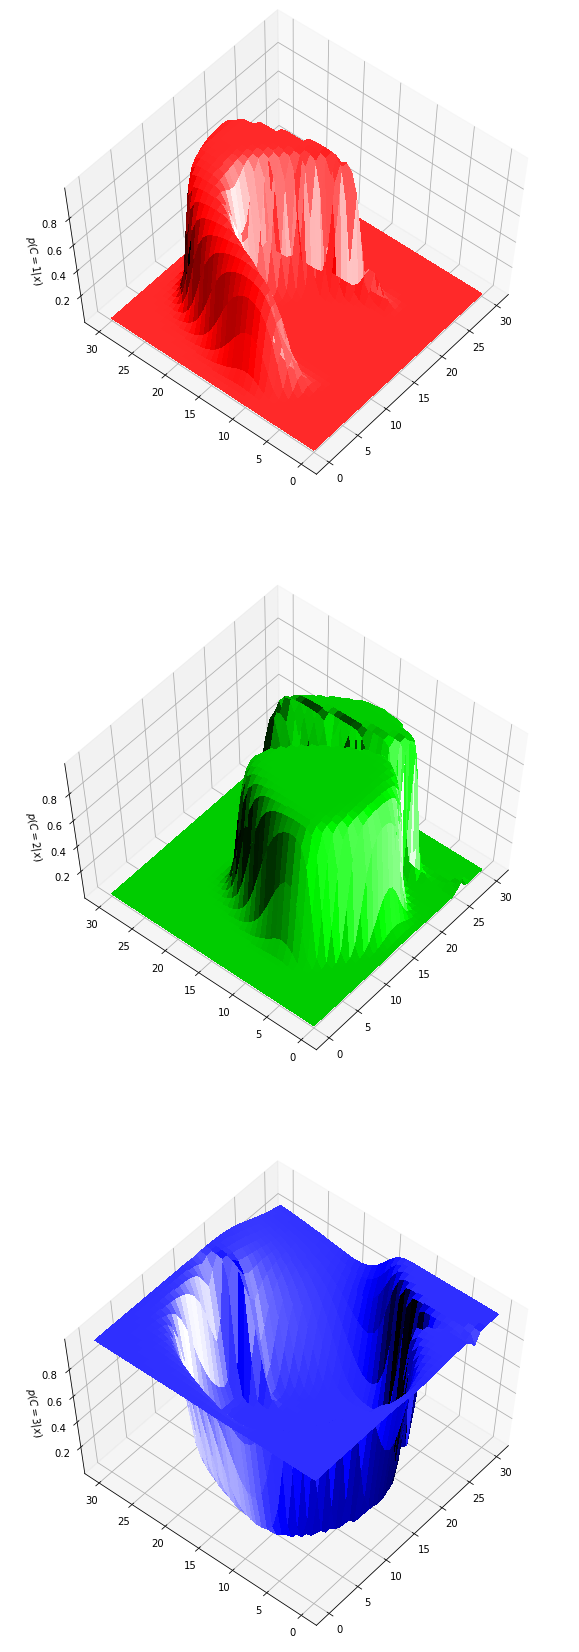

In [8]:
fig = plt.figure(figsize=(10,30))
ls = LightSource(azdeg=30, altdeg=60)
white = np.ones((x.shape[0], x.shape[1], 3))
red = white * np.array([1,0,0])
green = white * np.array([0,1,0])
blue = white * np.array([0,0,1])
colors = [red, green, blue]
#colors = ['red','green','blue']

for c in range(3):
    ax = fig.add_subplot(3,1,c+1,projection='3d')
    ax.view_init(azim = 180+40,elev = 60)
    Z = probs[:, c].reshape(x.shape)
    #ax.plot_surface(x,y,Z,
    #rstride=1,cstride=1,linewidth=0,antialiased=False,
    #                color=colors[c],alpha=1)
    rgb = ls.shade_rgb(colors[c], Z, vert_exag=0.1)
    #rgb = ls.shade(Z, plt.cm.gray)
    ax.plot_surface(x,y,Z,
                    rstride=1,cstride=1,linewidth=0, antialiased=False,
                    shade=False, facecolors=rgb)
    ax.set_zlabel(r"$p(C="+str(c+1)+"|x)$")

How would you plot the outputs of the hidden units?

Let's repeat the experiment with classifying human activity data (accelerometer data), but now use our *NeuralNetworkClassifier* class to do nonlinear logistic regression.  This time we will retrieve and load *accelerometers.npy*, a file containing a *numpy* array stored in its binary format.

In [10]:
!wget http://www.cs.colostate.edu/~anderson/cs440/notebooks/accelerometers.npy
data = np.load('accelerometers.npy')

--2017-10-31 09:45:46--  http://www.cs.colostate.edu/~anderson/cs440/notebooks/accelerometers.npy
Resolving www.cs.colostate.edu (www.cs.colostate.edu)... 129.82.45.114
Connecting to www.cs.colostate.edu (www.cs.colostate.edu)|129.82.45.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7200272 (6.9M)
Saving to: ‘accelerometers.npy.1’

accelerometers.npy. 100%[===================>]   6.87M  2.50MB/s    in 2.7s    

2017-10-31 09:45:49 (2.50 MB/s) - ‘accelerometers.npy.1’ saved [7200272/7200272]



In [11]:
data.shape

(225006, 4)

In [12]:
data[0,:]

array([ 1.        , -0.87313405, -0.08552787, -0.29504612])

In [13]:
X = data[:,1:]
T = data[:,0:1]
X.shape, T.shape

((225006, 3), (225006, 1))

In [14]:
import mlutils as ml # for ml.paritition

In [15]:
Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(0.8,0.2),classification=True) #stratified partitioning (by class)

In [16]:
Xtrain.shape,Ttrain.shape,Xtest.shape,Ttest.shape

((180006, 3), (180006, 1), (45000, 3), (45000, 1))

In [17]:
np.unique(Ttrain, return_counts=True)

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 array([18002, 18000, 18000, 18000, 18000, 18002, 18000, 18000, 18002, 18000]))

In [18]:
%precision 5
values,counts = np.unique(Ttrain, return_counts=True)
counts / Ttrain.shape[0]

array([ 0.10001,  0.1    ,  0.1    ,  0.1    ,  0.1    ,  0.10001,
        0.1    ,  0.1    ,  0.10001,  0.1    ])

In [19]:
values,counts = np.unique(Ttest, return_counts=True)
counts / Ttest.shape[0]

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

SCG: Iteration 5 ObjectiveF=0.18669 Scale=6.250e-08 Time=0.07593 s/iter
SCG: Iteration 10 ObjectiveF=0.16252 Scale=1.953e-09 Time=0.07887 s/iter
SCG: Iteration 15 ObjectiveF=0.15481 Scale=6.104e-11 Time=0.07818 s/iter
SCG: Iteration 20 ObjectiveF=0.14909 Scale=1.907e-12 Time=0.08048 s/iter
SCG: Iteration 25 ObjectiveF=0.14397 Scale=5.960e-14 Time=0.07856 s/iter
SCG: Iteration 30 ObjectiveF=0.14174 Scale=1.863e-15 Time=0.08906 s/iter
SCG: Iteration 35 ObjectiveF=0.13988 Scale=1.000e-15 Time=0.07887 s/iter
SCG: Iteration 40 ObjectiveF=0.13875 Scale=1.000e-15 Time=0.08145 s/iter
SCG: Iteration 45 ObjectiveF=0.13785 Scale=1.000e-15 Time=0.08226 s/iter
SCG: Iteration 50 ObjectiveF=0.13717 Scale=1.000e-15 Time=0.07907 s/iter


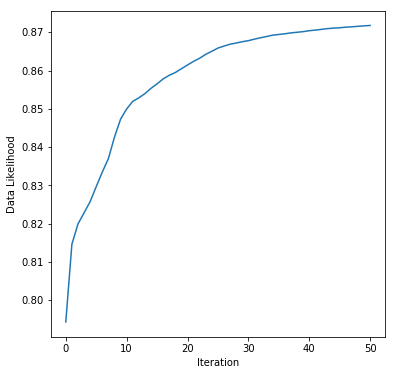

In [20]:
nnet = nn.NeuralNetworkClassifier(3,10,10) # 10 classes
nnet.train(Xtrain,Ttrain,nIterations=50,errorPrecision=1.e-8, verbose=True)

plt.rcParams['figure.figsize'] = (6,6)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

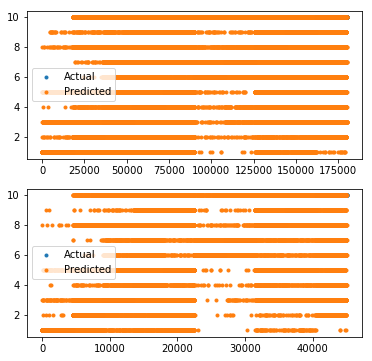

In [21]:
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
plt.subplot(2,1,1)
plt.plot(np.hstack((Ttrain,Ptrain)), '.')
plt.legend(('Actual','Predicted'))
plt.subplot(2,1,2)
plt.plot(np.hstack((Ttest,Ptest)), '.')
plt.legend(('Actual','Predicted'));


In [26]:
cm = ml.confusionMatrix(Ttest,Ptest,np.unique(Ttest))
print('1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs')

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 96.5  0.2  1.2  0.0  1.8  0    0    0.2  0.0  0     (4500 / 4500)
 2 | 15.7 55.3 17.5  0.8  2.6  0.1  0.1  4.5  0.2  3.2   (4500 / 4500)
 3 |  2.2  3.6 67.3  2.9  5.5  2.7  2.4  5.9  0.6  6.9   (4500 / 4500)
 4 |  3.5  4.2 26.3  8.3 16.5 10.6  6.3  7.5  4.2 12.7   (4500 / 4500)
 5 |  6.3  7.5 10.4  2.6 41.6  0.9  1.5 11.5 12.9  5.0   (4500 / 4500)
 6 |  0.0  0.0  0.0  0.2  0.2 71.9 23.7  0.5  0.2  3.2   (4500 / 4500)
 7 |  0.0  0.2  0.8  0.3  0.1 36.4 54.1  1.0  0.2  6.9   (4500 / 4500)
 8 |  1.0  0.7  7.1  3.1  9.5  2.0  3.3 31.8 35.2  6.4   (4500 / 4500)
 9 |  1.1  0.5  5.1  1.9 11.3  1.6  2.1 28.7 43.4  4.5   (4500 / 4500)
10 |  0.1  4.5 15.3  8.5  3.5 14.4 23.7  5.3  3.8 20.9   (4500 / 4500)
1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs


Try training for more iterations.

In [27]:
nnet = nn.NeuralNetworkClassifier(3,20,10) # 10 classes
nnet.train(Xtrain,Ttrain,nIterations=500,errorPrecision=1.e-8, verbose=True)
print('Trained for',nnet.getNumberOfIterations(),'iterations')

SCG: Iteration 50 ObjectiveF=0.13535 Scale=1.000e-15 Time=0.11048 s/iter
SCG: Iteration 100 ObjectiveF=0.12696 Scale=1.000e-15 Time=0.11154 s/iter
SCG: Iteration 150 ObjectiveF=0.12473 Scale=1.000e-15 Time=0.11859 s/iter
SCG: Iteration 200 ObjectiveF=0.12308 Scale=1.000e-15 Time=0.12128 s/iter
SCG: Iteration 250 ObjectiveF=0.12238 Scale=1.000e-15 Time=0.12383 s/iter
SCG: Iteration 300 ObjectiveF=0.12194 Scale=1.000e-15 Time=0.11282 s/iter
SCG: Iteration 350 ObjectiveF=0.12175 Scale=1.000e-15 Time=0.11272 s/iter
SCG: Iteration 400 ObjectiveF=0.12154 Scale=1.000e-15 Time=0.13299 s/iter
SCG: Iteration 450 ObjectiveF=0.12136 Scale=1.000e-15 Time=0.11297 s/iter
SCG: Iteration 500 ObjectiveF=0.12119 Scale=1.000e-15 Time=0.10566 s/iter
Trained for 500 iterations


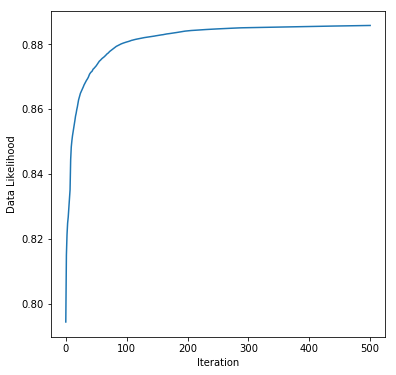

In [28]:
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

Percent Correct: Training 55.1803828761 Testing 55.1533333333

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 96.8  0.2  1.2  0.8  0.9  0    0    0.2  0.0  0     (4500 / 4500)
 2 |  4.5 78.6 10.0  1.3  2.8  0.1  0.1  1.8  0.2  0.6   (4500 / 4500)
 3 |  1.6  4.7 71.4  3.8  6.4  2.5  2.0  1.6  0.7  5.3   (4500 / 4500)
 4 |  1.5  6.1 25.1 13.5 13.2 10.8  5.1  5.8  4.3 14.5   (4500 / 4500)
 5 |  1.9  5.9 11.0  4.4 51.2  0.7  1.4  7.9 11.8  3.8   (4500 / 4500)
 6 |  0    0.1  0.5  0.2  0.1 75.5 19.4  0.5  0.2  3.5   (4500 / 4500)
 7 |  0.0  0.3  0.5  0.3  0.1 33.2 57.5  0.9  0.2  7.1   (4500 / 4500)
 8 |  0.1  2.2  6.8  3.3 11.0  1.1  4.4 31.8 32.8  6.4   (4500 / 4500)
 9 |  0.1  1.9  5.0  2.6  9.2  1.1  2.4 22.9 50.6  4.2   (4500 / 4500)
10 |  0.1  5.5 13.3  6.5  3.5 16.8 20.0  6.1  3.6 24.7   (4500 / 4500)
       1    2    3    4    5    6    7    8    9   10
    --------------------------------------------------

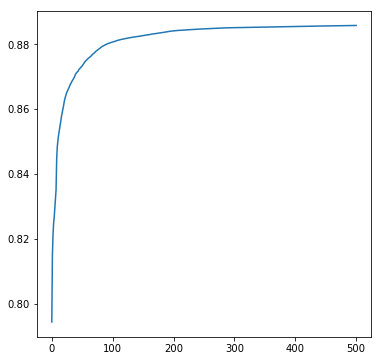

In [29]:
classes = np.unique(Ttest)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
print('Percent Correct: Training',100*np.sum(Ptrain==Ttrain)/len(Ttrain), 'Testing',100*np.sum(Ptest==Ttest)/len(Ttest))
print()
ml.printConfusionMatrix( ml.confusionMatrix(Ttest,Ptest,classes), classes )
print('1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs')
plt.plot(np.exp(-nnet.getErrorTrace()));

0.720365382473 0.000183278059877 148.720999405


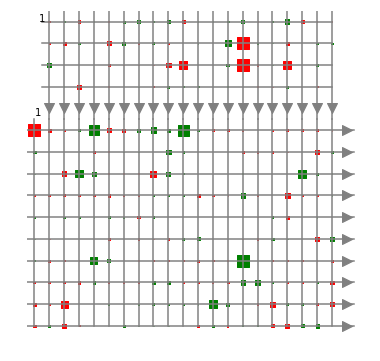

In [30]:
nnet.draw()

In [31]:
import scipy.signal as sig

def cwt(eeg,Fs,freqs,width,channelNames=None,graphics=False):
    if freqs.min() == 0:
        print('cwt: Frequencies must be greater than 0.')
        return None,None
    nChannels,nSamples = eeg.shape
    if not channelNames and graphics:
        channelNames = ['Channel {:2d}'.format(i) for i in range(nChannels)]

    nFreqs = len(freqs)
    tfrep = np.zeros((nChannels, nFreqs, nSamples))
    tfrepPhase = np.zeros((nChannels, nFreqs, nSamples))

    for ch in range(nChannels):
        print('channel',ch,' freq ',end='')
        for freqi in range(nFreqs):
            print(freqs[freqi],' ',end='')
            mag,phase = energyvec(freqs[freqi],eeg[ch,:],Fs,width)
            tfrepPhase[ch,freqi,:] = phase
            tfrep[ch,freqi,:] = mag
        print()

    return tfrep, tfrepPhase

def morletLength(Fs,f,width):
  ''' len = morletLength(Fs,f,width) '''
  dt = 1.0/Fs
  sf = f/width
  st = 1.0/(2*np.pi*sf)
  return int((3.5*st - -3.5*st)/dt)

def energyvec(f,s,Fs,width):
  '''
  function [y,phase] <- energyvec(f,s,Fs,width)
  function y <- energyvec(f,s,Fs,width)

  Return a vector containing the energy as a
  function of time for frequency f. The energy
  is calculated using Morlet''s wavelets.
  s : signal
  Fs: sampling frequency
  width : width of Morlet wavelet (><- 5 suggested).
  '''

  dt = 1.0/Fs
  sf = f/float(width)
  st = 1.0/(2*np.pi*sf)

  t = np.arange(-3.5*st,3.5*st,step=dt)
  m = morlet(f,t,width)
  # yconv = np.convolve(s,m,mode="same")
  yconv = sig.fftconvolve(s,m,mode='same')

  lengthMorlet = len(m)
  firsthalf = int(lengthMorlet/2.0 + 0.5)
  secondhalf = lengthMorlet - firsthalf

  padtotal = len(s) - len(yconv)
  padfront = int(padtotal/2.0 + 0.5)
  padback = padtotal - padfront
  yconvNoBoundary = yconv
  y = np.abs(yconvNoBoundary)**2
  phase = np.angle(yconvNoBoundary,deg=True)
  return y,phase

######################################################################
      
def morlet(f,t,width):
    '''
    function y <- morlet(f,t,width)
    Morlet''s wavelet for frequency f and time t.
    The wavelet will be normalized so the total energy is 1.
    width defines the width of the wavelet.
    A value ><- 5 is suggested.

    Ref: Tallon-Baudry et al., J. Neurosci. 15, 722-734 (1997), page 724

    Ole Jensen, August 1998
    '''
    sf = f/float(width)
    st = 1.0/(2*np.pi*sf)
    A = 1.0/np.sqrt(st*np.sqrt(2*np.pi))
    y = A*np.exp(-t**2/(2*st**2)) * np.exp(1j*2*np.pi*f*t)
    return y

In [32]:
import time
width = 75 * 1
maxFreq = 20
freqs = np.arange(0.5,maxFreq,0.5) # makes same freqs used in stft above
start = time.time()
tfrep,tfrepPhase = cwt(data[:,1:].T, 75, freqs, width)
print('CWT time: {} seconds'.format(time.time() - start))

channel 0  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 1  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 2  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
CWT time: 11.813153743743896 seconds


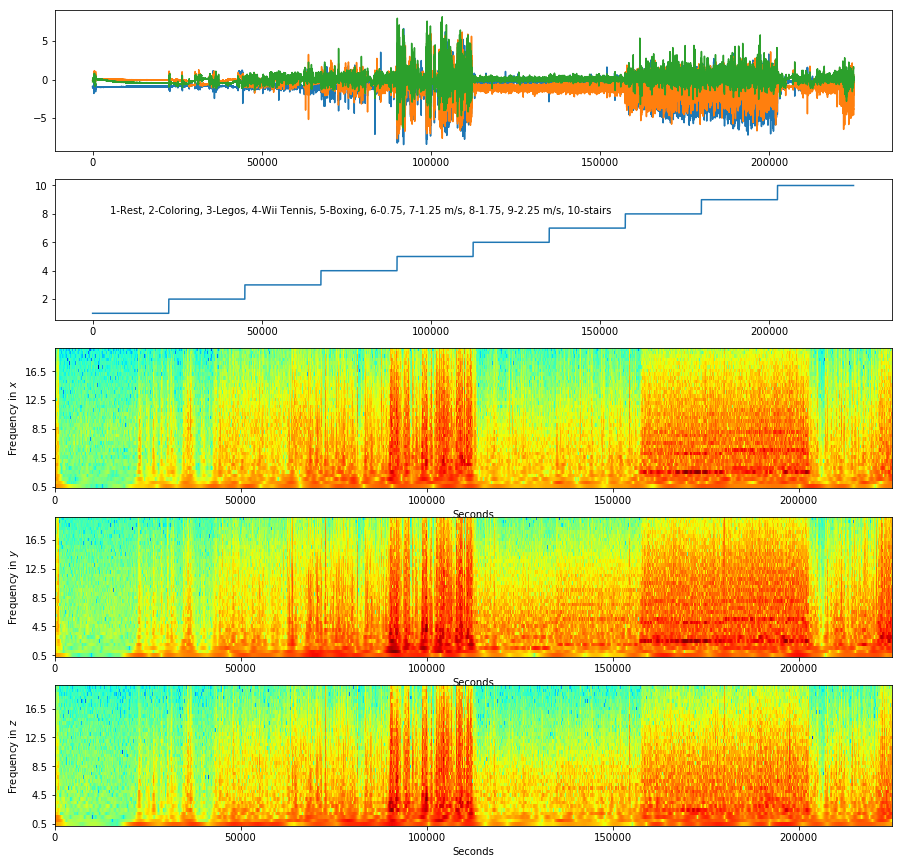

In [33]:
plt.figure(figsize=(15,15))
plt.subplot(5,1,1)
plt.plot(data[:,1:])
plt.axis('tight')

plt.subplot(5,1,2)
plt.plot(data[:,0])
plt.text(5000,8,'1-Rest, 2-Coloring, 3-Legos, 4-Wii Tennis, 5-Boxing, 6-0.75, 7-1.25 m/s, 8-1.75, 9-2.25 m/s, 10-stairs')
plt.axis('tight')

nSensors = data.shape[1] - 1
for i in range(nSensors):
    plt.subplot(5,1,i+3)
    plt.imshow(np.log(tfrep[i,:,:]), 
               interpolation='nearest',origin='lower',
               cmap=plt.cm.jet) #plt.cm.Reds)
    plt.xlabel('Seconds')
    plt.ylabel('Frequency in ' + ('$x$','$y$','$z$')[i])
    tickstep = round(len(freqs) / 5)
    plt.yticks(np.arange(len(freqs))[::tickstep],
                   [str(i) for i in freqs[::tickstep]])
    plt.axis('auto')
    plt.axis('tight')

In [34]:
tfrep.shape

(3, 39, 225006)

In [35]:
X = tfrep.reshape((3*39,-1)).T
X.shape, T.shape, len(np.unique(T))

((225006, 117), (225006, 1), 10)

In [36]:
Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(0.8,0.2),classification=True) #stratified partitioning (by class)

In [37]:
nnet = nn.NeuralNetworkClassifier(X.shape[1],20,10)  #10 classes 
nnet.train(Xtrain,Ttrain,nIterations = 100,errorPrecision=1.e-8, verbose=True)

SCG: Iteration 10 ObjectiveF=0.10075 Scale=1.953e-09 Time=0.17305 s/iter
SCG: Iteration 20 ObjectiveF=0.07111 Scale=3.815e-12 Time=0.15344 s/iter
SCG: Iteration 30 ObjectiveF=0.05519 Scale=3.725e-15 Time=0.14689 s/iter
SCG: Iteration 40 ObjectiveF=0.04706 Scale=1.000e-15 Time=0.15058 s/iter
SCG: Iteration 50 ObjectiveF=0.04150 Scale=1.000e-15 Time=0.14815 s/iter
SCG: Iteration 60 ObjectiveF=0.03314 Scale=1.000e-15 Time=0.15215 s/iter
SCG: Iteration 70 ObjectiveF=0.02958 Scale=1.000e-15 Time=0.14743 s/iter
SCG: Iteration 80 ObjectiveF=0.02677 Scale=1.000e-15 Time=0.16098 s/iter
SCG: Iteration 90 ObjectiveF=0.02356 Scale=1.000e-15 Time=0.15567 s/iter
SCG: Iteration 100 ObjectiveF=0.02153 Scale=1.000e-15 Time=0.17382 s/iter


NeuralNetwork(117, [20], 10)
   Network was trained for 100 iterations. Final error is 0.021529894593011096.

Percent Correct: Training 93.0396764552 Testing 92.8355555556

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 87.9 12.1  0    0    0    0    0    0    0    0     (4500 / 4500)
 2 | 18.1 74.8  7.1  0    0    0    0    0    0    0     (4500 / 4500)
 3 |  0    4.7 91.2  2.0  0    0    0    0    0    2.1   (4500 / 4500)
 4 |  0    0    0.6 99.0  0.4  0    0    0    0    0     (4500 / 4500)
 5 |  0    0    0    0  100.0  0    0    0    0    0     (4500 / 4500)
 6 |  0    2.8  0    0    0.5 92.0  0.4  0    0    4.3   (4500 / 4500)
 7 |  1.0  0    0    0    0    3.3 95.0  0.1  0    0.7   (4500 / 4500)
 8 |  0    0    0    0    0    0    0  100.0  0    0     (4500 / 4500)
 9 |  0    0    0    0    0    0    0    0.1 99.9  0.0   (4500 / 4500)
10 |  0    6.1  2.4  0    0    2.9  0    0    0   88.5   (4500 / 4500)
       1    2    3    4    5    6    7    8    9   10
    --------------------------------------------------

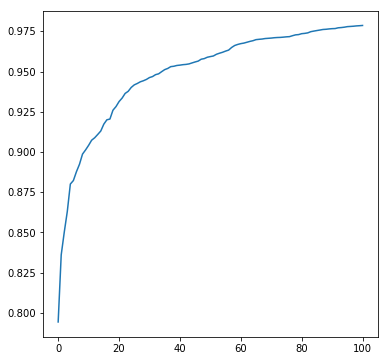

In [38]:
classes = np.unique(Ttest)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
print('Percent Correct: Training',100*np.sum(Ptrain==Ttrain)/len(Ttrain), 'Testing',100*np.sum(Ptest==Ttest)/len(Ttest))
print()
ml.printConfusionMatrix( ml.confusionMatrix(Ttest,Ptest,classes), classes )
print('1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs')
plt.plot(np.exp(-nnet.getErrorTrace()));

1.22639427251 5.04990935807e-10 15.2587890625


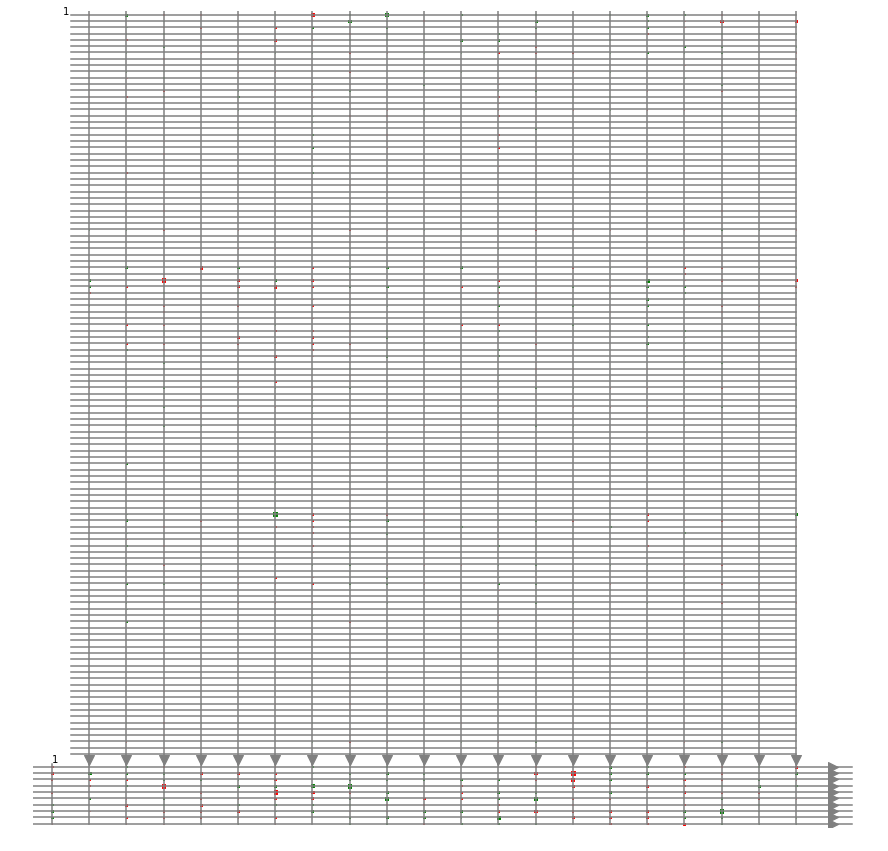

In [39]:
plt.figure(figsize=(15,15))
nnet.draw()

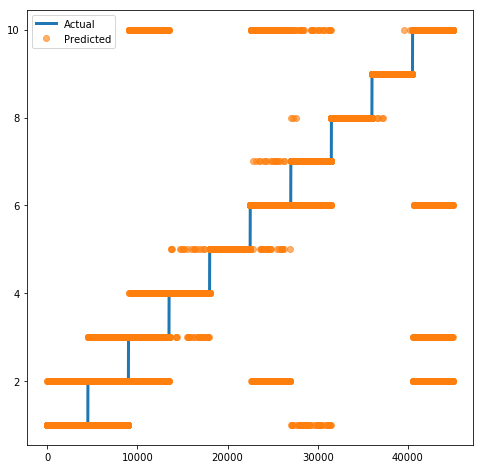

In [40]:
plt.figure(figsize=(8,8))
plt.plot(Ttest,lw=3)
plt.plot(Ptest,'o',alpha=0.6)
plt.legend(('Actual','Predicted'),loc='best');